Documentation :

- text cleaning for **Reason** feature

- created word cloud for **Reason** cleaned text description

- Plot **Avg. Employee Count for a Company,No.of Funding Rounds,No.of Investors,total funding (in $**) using Horizontal Bar Plot

- Plot **Launch Date** and **Close Date** of Companies using Bar Plot in group mode

- Plot Hist Plot of **Cities** and **Acquisition Status** of the companies

- Plot **Top 10 Company Categories** using Bar Plot

# EDA - data2 



In [1]:
import pandas as pd

In [2]:
path_to_file = '/content/cleaned_failure_startup_autopsy_data [data2].csv'
clean_df = pd.read_csv(path_to_file)
clean_df.head()

,Unnamed: 0,Company_Name,Company_type,Business_type,Description,Reason,Failure categories,Number of investors,Founders,Number of funding rounds,Funding Status,City,Launch_Year,Close Year,Acquisition_status(y/n),avg_employee_count,total_funding(in $)
0,0,Amiloom,Information Technology,B2C,Device forms network of people w/common friends,Cannot be clearly explained in 3 seconds,Poor Marketing,1,Anders Hsi,1,Crowfunding,San Francisco,2012,2014,no,5.5,15000.0
1,1,Backfence,"Communities, Internet, Web Hosting",B2C,create hyper-local community sites,internal problems made it impossible to reach ...,no_data,2,Mark Potts,1,Venture - Series Unknown,Mclean,2004,2007,no,30.5,3000000.0
2,2,Circa_News,"Mobile, News, Apps",B2C,Mobile news app,"Lack of funding, no buyers",No Financing or Investor Interest,39,"Arsenio Santos, Ben Huh, Matt Galligan",7,M&A,San Francisco,2011,2015,yes,30.5,4737750.0
3,3,DeviceFidelity,"Mobile, Wireless, Payments",B2B,Contactless payments / NFC for iphone,Apple built NFC into new product line,no_data,2,"Amitaabh Malhotra, Deepak Jain",4,M&A,Richardson,2007,2015,yes,30.5,9646024.0
4,4,Gumroad_,"Content, Creative Agency, E-Commerce",B2C,Owns and operates an online service through wh...,It took years for me to realize my pursuit of ...,no_data,10,Sahil Lavingia,2,Series A,San Francisco,2011,2019,no,30.5,8100000.0


In [3]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                21 non-null     int64  
 1   Company_Name              21 non-null     object 
 2   Company_type              21 non-null     object 
 3   Business_type             21 non-null     object 
 4   Description               21 non-null     object 
 5   Reason                    21 non-null     object 
 6   Failure categories        21 non-null     object 
 7   Number of investors       21 non-null     int64  
 8   Founders                  21 non-null     object 
 9   Number of funding rounds  21 non-null     object 
 10  Funding Status            21 non-null     object 
 11  City                      21 non-null     object 
 12  Launch_Year               21 non-null     int64  
 13  Close Year                21 non-null     int64  
 14  Acquisition_

- text preprocessing the *Failure Reason* text

In [ ]:
import re
import string

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def clean_text(text):

  text = str(text).lower()

  text = re.sub('https?://\S+|www\.\S+','',text)
  text = re.sub('<.,*?>+','',text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'',text)

  return text

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_textdata(text):

  """util function to preprocess text data"""

  text = clean_text(text)
  text = ' '.join(w for w in text.split(' ') if w not in stop_words)
  text = ' '.join(lemmatizer.lemmatize(w) for w in text.split(' '))

  return text

In [ ]:
clean_df['reason_clean'] = clean_df['Reason'].apply(preprocess_textdata)

#### Word Cloud for Failure Reasons

In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [ ]:
count_vec = CountVectorizer()

count_dtm = count_vec.fit_transform(clean_df['reason_clean'])

words = count_vec.get_feature_names()
words_count = count_dtm.sum(axis=0).A1

words_dict = dict(zip(words,words_count))

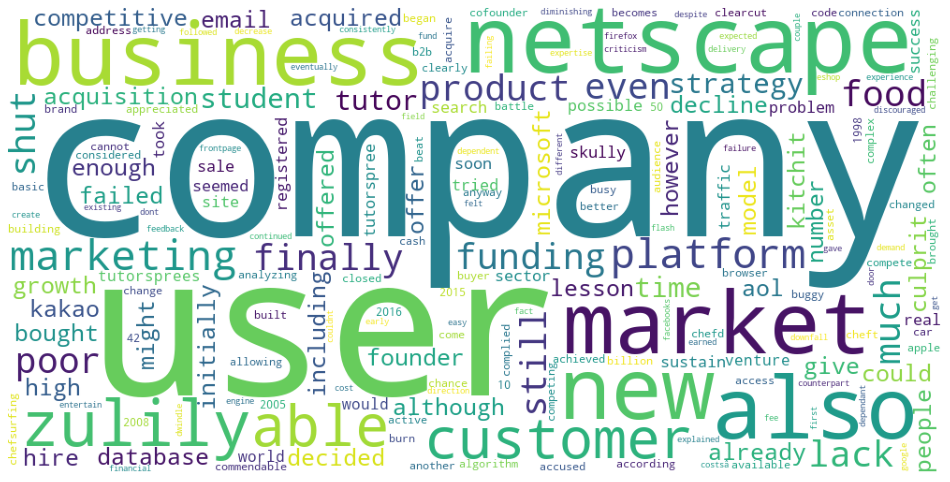

In [ ]:
wc = WordCloud(
    background_color = 'white',
    width = 1000,
    height= 500
).generate_from_frequencies(words_dict)

plt.figure(figsize = (13,8))
plt.axis("off")
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.show()

word cloud containing the words with most frequency

#### Plot avg_employee_count

                Bar Plot of companies and their respective Avg.
                Employee Count

---









In [ ]:
import plotly.express as px

fig = px.bar(clean_df,y='Company_Name',x='avg_employee_count',orientation='h',title = "Avg Employee Count in a Company")
fig.show()

In [ ]:
clean_df.columns

Index(['Unnamed: 0', 'Company_Name', 'Company_type', 'Business_type',
       'Description', 'Reason', 'Failure categories', 'Number of investors',
       'Founders', 'Number of funding rounds', 'Funding Status', 'City',
       'Launch_Year', 'Close Year', 'Acquisition_status(y/n)',
       'avg_employee_count', 'total_funding(in $)', 'reason_clean'],
      dtype='object')

Plot Total Funding(in $)

                Bar Plot of companies and their respective total funding(in $)

---



In [ ]:
fig = px.bar(clean_df,y='Company_Name',x='total_funding(in $)',orientation='h',title='Total Funding(in $) for a Company')
fig.show()

#### Launch and Close Year Data of Companies

                Bar Plot (in group mode) of companies and their respective Launch Date and Close Date

---



In [ ]:
companies = clean_df['Company_Name']

In [ ]:
Companies = list(clean_df['Company_Name'].values)
Launch_Year = list(clean_df['Launch_Year'].values)
Close_Year  = list(clean_df['Close Year'].values)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x= Companies,
    y=Launch_Year,
    name='Launch Year',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=Companies,
    y=Close_Year,
    name='Close Year',
    marker_color='lightsalmon'
))

fig.update_yaxes(range=[1990,2020])

fig.update_layout(barmode='group', xaxis_tickangle=-45,title='Launch and Close Year of the Companies')
fig.show()

#### No. of Investors of a Company

                Bar Plot of companies and their # of investors

---



In [ ]:
import plotly.express as px

fig = px.bar(clean_df,y='Company_Name',x='Number of investors',orientation='h',title = "Number of Investors in a Company")
fig.show()

#### No. of Funding Rounds

                Bar Plot of companies and their # of funding rounds

---



In [ ]:
import plotly.express as px

#### Count of Cities the companies are based in

                Hist Plot of the companies located city

---



In [ ]:
fig = px.histogram(clean_df,"City",title="Count of Cities the companies are based in")
fig.show()

#### Acquisition Status of the Companies

                Hist Plot of Acquisition status of companies

---



In [ ]:
fig = px.histogram(clean_df,"Acquisition_status(y/n)",title="Acquisition Status of the companies")
fig.show()

#### Top Company Categories

In [4]:
company_types_list1 = [i.split(',') for i in clean_df['Company_type']]

In [5]:
company_types_list1

[['Information Technology'],
 ['Communities', ' Internet', ' Web Hosting'],
 ['Mobile', ' News', ' Apps'],
 ['Mobile', ' Wireless', ' Payments'],
 ['Content', ' Creative Agency', ' E-Commerce'],
 ['Internet', ' Hospitality', ' Consumer', ' Service Industry'],
 ['Food and Beverage', ' Nutrition', ' Organic Food'],
 ['Customer Service', ' Housekeeping Service', ' Restaurants'],
 ['Advertising', ' Marketing', ' Social Network'],
 ['E-Commerce', ' Marketing', ' News', ' Software'],
 ['Energy', ' Energy Efficiency', ' Home Renovation', ' Renewable Energy'],
 ['Analytics', ' Application Performance Management', ' Enterprise Software'],
 ['Mobile', ' Photo Sharing', ' Messaging'],
 ['Analytics', ' Politics', ' Government'],
 ['Shipping', ' Delivery', ' Logistics', ' Shipping and fulfilment'],
 ['Consumer Electronics',
  ' Information Technology',
  ' Automotive',
  ' Wearables',
  ' Augmented Reality',
  ' Public Safety'],
 ['SaaS', ' Enterprise Software'],
 ['E-Commerce', ' EdTech', ' Educat

In [6]:
import itertools

c_list = list(itertools.chain.from_iterable(company_types_list1))

In [7]:
c_list = [i.strip() for i in c_list]

In [8]:
from collections import Counter
c_list_count = Counter(c_list)

In [9]:
c_list_count

Counter({'Advertising': 1,
         'Analytics': 2,
         'Application Performance Management': 1,
         'Apps': 2,
         'Augmented Reality': 1,
         'Automotive': 1,
         'Communities': 1,
         'Consumer': 1,
         'Consumer Electronics': 1,
         'Content': 1,
         'Creative Agency': 1,
         'Customer Service': 1,
         'Delivery': 2,
         'Digital Media': 1,
         'E-Commerce': 4,
         'EdTech': 1,
         'Education': 1,
         'Energy': 1,
         'Energy Efficiency': 1,
         'Enterprise Software': 2,
         'Food and Beverage': 1,
         'Government': 1,
         'Home Renovation': 1,
         'Hospitality': 1,
         'Housekeeping Service': 1,
         'Information Technology': 2,
         'Internet': 2,
         'Logistics': 1,
         'Marketing': 2,
         'Messaging': 1,
         'Mobile': 3,
         'News': 2,
         'Nutrition': 1,
         'Organic Food': 1,
         'Payments': 1,
         'Photo Shari

In [10]:
c_list_df = pd.DataFrame.from_dict(c_list_count,orient='index').reset_index()
c_list_df.columns = ['company_type','count']
c_list_df

,company_type,count
0,Information Technology,2
1,Communities,1
2,Internet,2
3,Web Hosting,1
4,Mobile,3
5,News,2
6,Apps,2
7,Wireless,1
8,Payments,1
9,Content,1


In [11]:
c_list_df = c_list_df.sort_values(['count'],axis = 0,ascending=False)

In [15]:
c_list_df.reset_index(drop=True,inplace=True)

In [17]:
top_10_ctype = c_list_df[:10]

In [18]:
top_10_ctype

,company_type,count
0,E-Commerce,4
1,Mobile,3
2,Information Technology,2
3,Social Network,2
4,Analytics,2
5,Marketing,2
6,Delivery,2
7,Apps,2
8,News,2
9,Enterprise Software,2


                Bar Plot of Top 10 Company Categories

---



In [19]:
import plotly.express as px

fig = px.bar(top_10_ctype,y='company_type',x='count',orientation='h',title = "Top 10 Company Categories")
fig.show()